<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Machine Learning: Unsupervised Techniques, SS 2019</h2>

<h3 style="color:rgb(0,120,170)">Deadline March 17th 2019, 24:00</h3>
Return this notebook with your code and answers.

# Notes:

----------------
----------------
<h3 style="color:rgb(0,120,170)">Why log likelihood instead of the likelihood:</h3>

* log is monotonically increasing, so log likelihood is a monotonically increasing transformation of likelihood
    * $p(x;\theta_1) > p(x;\theta_2) \Leftrightarrow \ln p(x;\theta_1) > \ln p(x;\theta_2)$
    * $\underset{\theta}{arg\,max\,} p(x;\theta) = \underset{\theta}{arg\,max\,} \ln p(x;\theta)$    
* products become sums
    * $L = p_1 p_2 p_3$
    * $\ln(L) = \ln(p_1) + \ln(p_2) + \ln(p_3)$
* derivatives are easier
    * $\frac{\partial L}{\partial \theta} = 
    \frac{\partial p_1}{\partial \theta} p_2 p_3 +
    p_1 \frac{\partial p_2}{\partial \theta} p_3 +
    p_1 p_2 \frac{\partial p_3}{\partial \theta}
    $
    * $\frac{\partial \ln(L)}{\partial \theta} = 
    \frac{\partial \ln(p_1)}{\partial \theta} +
    \frac{\partial \ln(p_2)}{\partial \theta} + 
    \frac{\partial \ln(p_3)}{\partial \theta}$
* likelihoods become very small and consequently they run out of floating point precision very quickly
    * log likelihoods are numerically more stable
* for some distributions the log space avoids expansive computation
    * exp in gaussian pdf:
        * $p(x; \theta) = \frac{1}{(\sqrt{2\pi})^{d}\sqrt{det \Sigma}}\exp^{-\frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu)}$
    * no exp in log space:
        * $\ln p(x; \theta) = -\frac{d}{2}\ln(2\pi) -\frac{1}{2}\ln(det \Sigma) - \frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu)$

----------------
----------------
<h3 style="color:rgb(0,120,170)">Make sure you understand the log-functions:</h3>

* Get familiar with the definition and calculation rules of log functions.
    * $\log(ab) = \log(a) + \log(b)$
    * etc
* Be aware about the different log functions (e.g. ln, log2, log10, ...)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

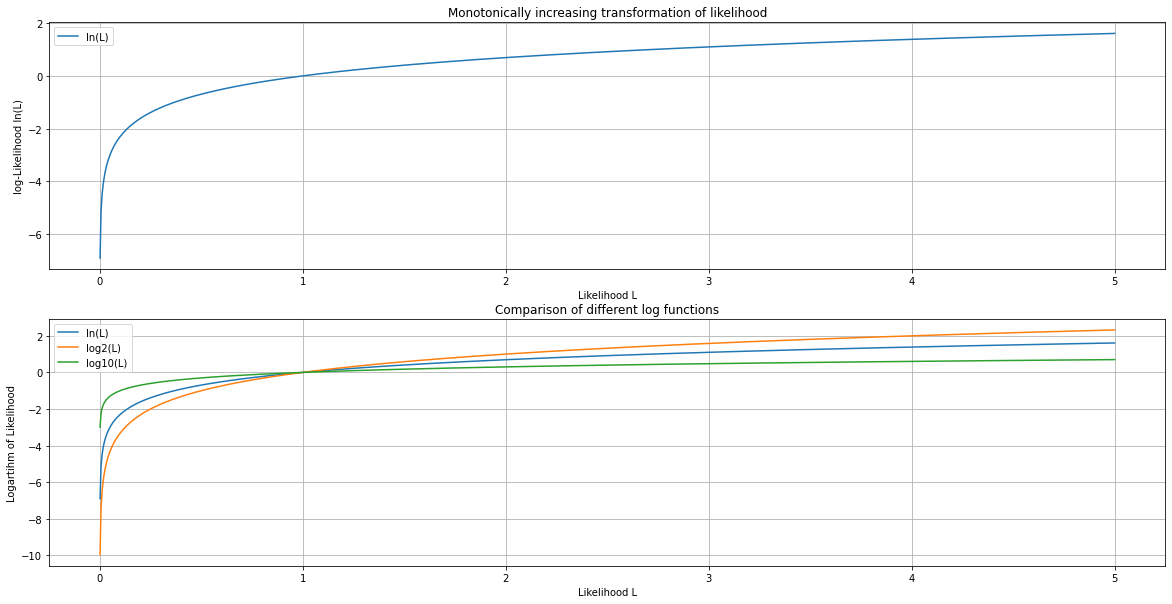

In [2]:
# plot the ln
# compare ln=log, log2, log10

L = np.linspace(0.001,5,1000)
L_ln = np.log(L)
L_log2 = np.log2(L)
L_log10 = np.log10(L)

fig = plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(L, L_ln, label='ln(L)')
plt.xlabel('Likelihood L')
plt.ylabel('log-Likelihood ln(L)')
plt.grid()
plt.legend()
plt.title("Monotonically increasing transformation of likelihood")

plt.subplot(2,1,2)
plt.plot(L, L_ln, label='ln(L)')
plt.plot(L, L_log2, label='log2(L)')
plt.plot(L, L_log10, label='log10(L)')
plt.xlabel('Likelihood L')
plt.ylabel('Logartihm of Likelihood')
plt.grid()
plt.legend()
plt.title("Comparison of different log functions")
plt.show()

# Exercise 1:

Consider a sequence of independent and identically distributed (i.i.d.) random variables $x_{1}, x_{2},...,x_{n}$ that are sampled from a normal distribution with an unknown expectation parameter $\mu$ and a known standard deviation parameter $\sigma$, i.e.
$x_{i}$ are distributed according to the density function

$$
p(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^{2}}} exp^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
$$

----------------
----------------
<h3 style="color:rgb(0,120,170)">Question 1:</h3>

 1. Implement 
     * <span style="color:rgb(0,120,170)">**TODO:** Code</span> the log-likelihood function in python
     * <span style="color:rgb(0,120,170)">**TODO:** Code</span> the calculate_log_likelihood_over_mu in python
 2. Determine the Cramer-Rao lower bound for the variance of an unbiased estimator for the parameter $\mu$.
     * <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>
     * <span style="color:rgb(0,120,170)">**TODO:** Code</span> Implement the fischer information formula for $\mathbf{I}_F(\mu)$
 3. Describe in your own words:
     * How does the variance of the estimator of the mean $\mu$ depend on standard deviation $\sigma$ and sample number $n$?
     * Which values of $\sigma$ are better for estimating $\mu$?
     * <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 1.1:</h3>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def gauss_function(x, mu, sigma):
    """ This is the 1D gaussian probability density function with mean mu and standard deviation sigma """
    
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x - mu)**2/(2*sigma**2))

In [5]:
def generate_data(mu, sigma, samples):
    """ This funtion generates the data """
    
    x = np.linspace(-5,15,samples)
    
    # get density over x
    density = gauss_function(x, mu, sigma)
    
    # sample for the gaussian distribution
    X_samples = sigma*np.random.randn(n) + mu
    
    return x, density, X_samples

In [6]:
# here we generate 3 datasets with same mu = 5 but different sigmas = 1,2,4
n = 100
mu = 5.0

sigma_1 = 1.0
x, p1, X1 = generate_data(mu, sigma_1, samples=n)

sigma_2 = 2.0
_, p2, X2 = generate_data(mu, sigma_2, samples=n)

sigma_3 = 4.0
_, p3, X3 = generate_data(mu, sigma_3, samples=n)

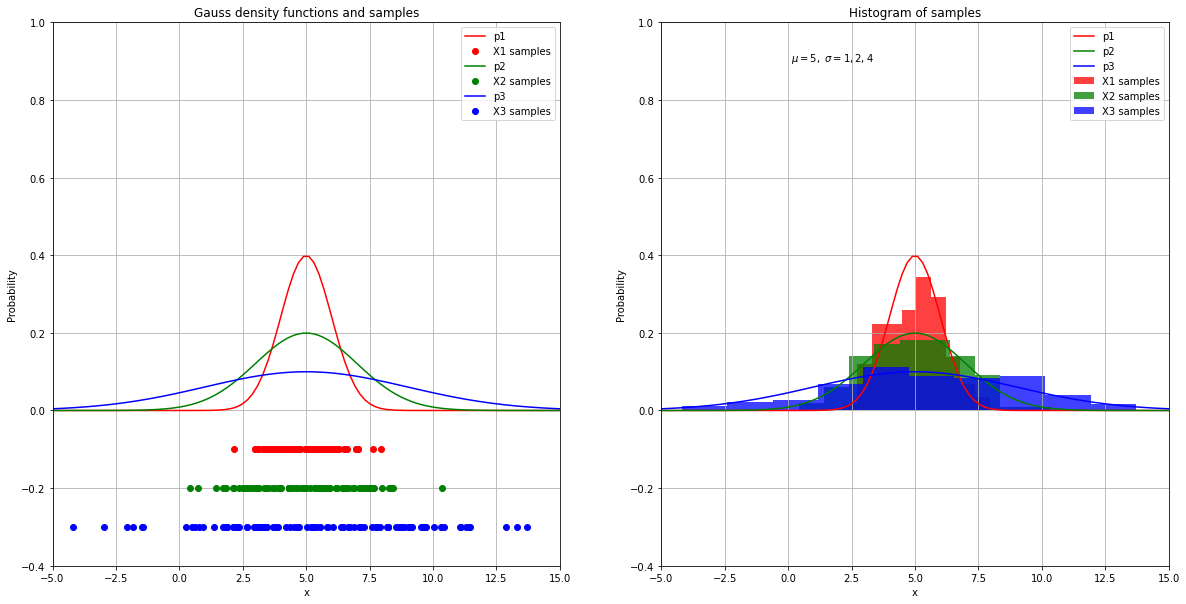

In [7]:
# this code is only for plotting
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(x, p1, label='p1', color='r')
plt.plot(X1, np.repeat(-0.1, len(x)), 'ro', label='X1 samples')
plt.plot(x, p2, label='p2', color='g')
plt.plot(X2, np.repeat(-0.2, len(x)), 'go', label='X2 samples')
plt.plot(x, p3, label='p3', color='b')
plt.plot(X3, np.repeat(-0.3, len(x)), 'bo', label='X3 samples')
plt.axis([-5, 15, -0.4, 1.0])
plt.grid()
plt.title('Gauss density functions and samples')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()

# the histogram of the data
plt.subplot(1,2,2)
n, bins, patches = plt.hist(X1, density=True, facecolor='r', alpha=0.75, label='X1 samples')
plt.plot(x, p1, label='p1', color='r')
n, bins, patches = plt.hist(X2, density=True, facecolor='g', alpha=0.75, label='X2 samples')
plt.plot(x, p2, label='p2', color='g')
n, bins, patches = plt.hist(X3, density=True, facecolor='b', alpha=0.75, label='X3 samples')
plt.plot(x, p3, label='p3', color='b')
plt.legend()

plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram of samples')
plt.text(0.1, 0.9, r'$\mu=5,\ \sigma=1,2,4$')
plt.axis([-5, 15, -0.4, 1.0])
plt.grid(True)
plt.show()

## Likelihood and Log-Likelihood
**Likelihood:**
$$\mathcal{L}(w) = \prod_{i=1}^n p(x_i ; w)$$

**Log-Likelihood:**
$$\ln\mathcal{L}(w) = \sum_{i=1}^n \ln p(x_i ; w)$$

<span style="color:rgb(208,90,80)">**TODO:** Code</span>
Implement the log_likelihood

In [8]:
def log_likelihood(data, mu, sigma):
    """ Calculates the log likelihood"""
    
    #TODO: Implement the log_likelihood
    return np.log(gauss_function(data, mu, sigma)).sum()

In [9]:
print(log_likelihood(X1, mu=5, sigma=sigma_1))
print(log_likelihood(X2, mu=5, sigma=sigma_2))
print(log_likelihood(X3, mu=5, sigma=sigma_3))

-158.0920611457553
-206.14983279060985
-275.147893882553


<span style="color:rgb(208,90,80)">**TODO:** Code</span>
calculate_log_likelihood_over_mu

In [10]:
def calculate_log_likelihood_over_mu(data, sigma):
    """This function calculates the log likelihood over different mus"""
    
    mu_set = np.linspace(-5,15,101) # (1) keep this: array over different mus
        
    # calaculate the log likelihood for each mu and save it in a list
    lnL_list = [log_likelihood(data, mu, sigma) for mu in mu_set] #[-2.0,-1.0,-2.0]
    
    lnL_array = np.array(lnL_list)
    return mu_set, lnL_array

In [11]:
mu_set, lnL_array1 = calculate_log_likelihood_over_mu(X1, sigma_1)
_, lnL_array2 = calculate_log_likelihood_over_mu(X2, sigma_2)
_, lnL_array3 = calculate_log_likelihood_over_mu(X3, sigma_3)

In [12]:
print(mu_set[np.argmax(lnL_array1)])
print(mu_set[np.argmax(lnL_array2)])
print(mu_set[np.argmax(lnL_array3)])

5.0
5.0
5.600000000000001


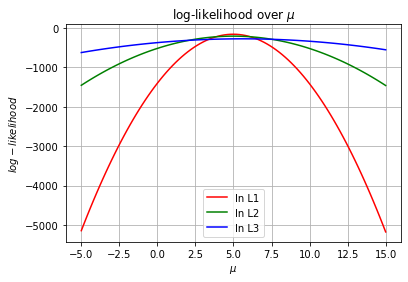

In [13]:
plt.plot(mu_set, lnL_array1, label='ln L1', color='r')
plt.plot(mu_set, lnL_array2, label='ln L2', color='g')
plt.plot(mu_set, lnL_array3, label='ln L3', color='b')
plt.grid()
plt.legend()
plt.title("log-likelihood over $\mu$")
plt.ylabel('$log-likelihood$');
plt.xlabel('$\mu$');

<h3 style="color:rgb(208,90,80)">Answer 1.2:</h3>

<span style="color:rgb(208,90,80)">**Determine the Cramer-Rao lower bound for the variance of an unbiased estimator for the parameter $\mu$.**</span>

$$
\frac{\delta \text{ln}(\mathcal{L}(x; w))}{\delta w} = \\
\frac{\delta}{\delta w} \sum_i^n \text{ln}(\frac{1}{\sqrt{2\pi\sigma^{2}}} exp^{-\frac{(x_i-\mu)^{2}}{2\sigma^{2}}})
$$
Applying logarithm rules:
$$
\frac{\delta}{\delta w} \sum_i^n \underbrace{\text{ln}(\frac{1}{\sqrt{2\pi\sigma^{2}}} exp^{-\frac{(x_i-\mu)^{2}}{2\sigma^{2}}}}_\text{$ln(ab) = ln(a) + ln(b)$} = \\
\frac{\delta}{\delta w} \sum_i^n \text{ln}(\frac{1}{\sqrt{2\pi\sigma^{2}}}) + \text{ln}(e^{-\frac{(x_i-\mu)^{2}}{2\sigma^{2}}}) = \\
\frac{\delta}{\delta w} \sum_i^n \text{ln}(\frac{1}{\sqrt{2\pi\sigma^{2}}}) -\frac{(x_i-\mu)^{2}}{2\sigma^{2}}
$$
Taking constant out of sum: 
$$
\frac{\delta}{\delta w} \sum_i^n \underbrace{\text{ln}(\frac{1}{\sqrt{2\pi\sigma^{2}}})}_\text{constant} -\frac{(x_i-\mu)^{2}}{\underbrace{2\sigma^{2}}_\text{constant}} = \\
\frac{\delta}{\delta w} \sum_i^n \text{ln}(\frac{1}{\sqrt{2\pi\sigma^{2}}}) + \frac{1}{2\sigma^{2}} \sum_i^n  -(x_i-\mu)^{2}$$
Derivative with respect to $\mu$:
$$
\frac{\delta}{\delta w} \underbrace{\sum_i^n \text{ln}(\frac{1}{\sqrt{2\pi\sigma^{2}}})}_\text{Derivative of constant equals 0} + \frac{1}{2\sigma^{2}} \sum_i^n -(x_i-\mu)^{2} = \\
\frac{\delta}{\delta w} \frac{1}{2\sigma^{2}} \sum_i^n -(x_i-\mu)^{2} = \\
\frac{\delta}{\delta w} \frac{1}{2\sigma^{2}} \sum_i^n -x_i^2 + 2x_i\mu - \mu^2 = \\
\frac{1}{2\sigma^{2}} \sum_i^n 2x_i - 2\mu = \\
\frac{1}{\sigma^{2}} \sum_i^n x_i - \mu
$$

Using fisher information matrix: 

$$
I_F(w) := \text{Var}_{p(x; w)} ((\frac{\delta}{\delta w} \text{ln} \mathcal{L}(w))^2) = \\
\text{Var}_{p(x; w)} (\underbrace{\frac{1}{\sigma^{2}}}_\text{Var$(ab) = a^2 \cdot$ Var$(b)$} \sum_i^n x_i - \mu) = \\
\frac{1}{\sigma^4} \underbrace{\text{Var}_{p(x; w)} (\sum_i^n x_i - \mu)}_\text{$x_i$ are independent and identically distributed}  = \\
\frac{1}{\sigma^4} \sum_i^n \underbrace{\text{Var}_{p(x; w)} (x_i - \mu)}_\text{Var$(a + c) = $Var$(a)$} = \\
\frac{1}{\sigma^4} \sum_i^n \text{Var}_{p(x; w)} (x_i)
$$
Simplifying: 
$$
\frac{1}{\sigma^4} \sum_i^n \text{Var}_{p(x; w)} (x_i) = \\
\frac{1}{\sigma^4} \sum_i^n \sigma^2 = \frac{1}{\sigma^4} n \sigma^2 = \frac{n}{\sigma^2}
$$

From that we can infer the CRLB from the inverse of the Fisher information ($I_F$): 

$$
CRLB \ge \frac{1}{I_F(w)} = \frac{\sigma^2}{n}
$$

#### Fischer information
<span style="color:rgb(208,90,80)">**TODO:** Code</span>
Implement the fisher information formula for $\mathbf{I}_F(\mu)$

In [14]:
def fischer_information_mu(n, sigma):
    """ Calculate the fischer information  """
    
    return n/sigma**2

In [15]:
print("Fischer Information sigma=1: IF =", fischer_information_mu(n=100, sigma=1))
print("Fischer Information sigma=2: IF =", fischer_information_mu(n=100, sigma=2))
print("Fischer Information sigma=4: IF =", fischer_information_mu(n=100, sigma=4))

Fischer Information sigma=1: IF = 100.0
Fischer Information sigma=2: IF = 25.0
Fischer Information sigma=4: IF = 6.25


<h3 style="color:rgb(208,90,80)">Answer 1.3:</h3>
    
<span style="color:rgb(208,90,80)">**TODO:** Markdown, Latex</span>
(1-2 Sentences are enough)

**How does the variance of the estimator of the mean $\mu$ depend on standard deviation $\sigma$ and sample number $n$?**
With bigger $n$ the variance of the estimator of the mean $\mu$ will decrease $\xrightarrow{}$ better estimation.

With bigger $\sigma^2$ the the variance of the estimator of the mean will increase (as can be seen above) $\xrightarrow{}$ worse estimation.

In other words, the higher $\sigma^2$, the lower the Fisher information ($I_F$). Since the CRLB is at least the inverse of the Fisher information, the lower bound for the variance of the estimator for $\mu$ will also increase. 

**Which values of $\sigma$ are better for estimating $\mu$?**
Lower values are better, as can be seen in the code snippet above and the explaination above. This is due to the relation of the CRLB and the inverse Fisher information.

----------------
----------------
<h3 style="color:rgb(0,120,170)">Question 2:</h3>

 1. Consider the estimator $\hat\mu = \sum_{i}^{n} \frac{1}{n} x_{i}$ i.e. the aritmetic mean of the observations. Show that this is an unbiased estimator for the parameter $\mu$.
     * <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>
 
 2. Check if the estimator $\hat\mu = \frac{1}{n} \sum_{i}^{n} x_{i}$ i is efficient.
     * <span style="color:rgb(0,120,170)">**TODO:** Markdown, Latex</span>

<h3 style="color:rgb(208,90,80)">Answer 2.1:</h3>

<span style="color:rgb(208,90,80)">**TODO:** Markdown, Latex</span>

$\hat\mu = \sum_{i}^{n} \frac{1}{n} x_{i}$ is unbiased iff $E(\hat{w}) = w$. 

$$
E(\hat{\mu}) = \underbrace{E(\sum_i^n \frac{1}{n} x_i)}_\text{$E(c \cdot x) = c E(x)$} = \\
\frac{1}{n} \underbrace{E(\sum_i^n x_i)}_\text{$x_i$ are independent and identically distributed} = \\
\frac{1}{n} \sum_i^n \underbrace{E(x_i)}_\text{$x_i$ are independent and identically distributed} = \\
\frac{1}{n} \sum_i^n \mu
$$
Simplifying: 
$$
\frac{1}{n} \sum_i^n \mu = \frac{1}{n} n\mu = \mu
$$

We see that the estimator is unbiased.

<h3 style="color:rgb(208,90,80)">Answer 2.2:</h3>

<span style="color:rgb(208,90,80)">**TODO:** Markdown, Latex</span>

$\hat\mu = \frac{1}{n} \sum_i^n x_i$ is efficient iff $\text{Var}(\hat{\mu}) = \text{CRLB}(\mu)$.

We know that CRLB $= \frac{\sigma^2}{n}$, now we have to check if $\text{Var}(\hat{\mu}) = \frac{\sigma^2}{n}$

$$
\text{Var}(\hat{\mu}) = \text{Var}\underbrace{(\frac{1}{n} \sum_i^n x_i)}_\text{Var$(ab) = a^2 \cdot$ Var$(b)$} = \\
\frac{1}{n^2} \underbrace{\text{Var}(\sum_i^n x_i)}_\text{$x_i$ are independent and identically distributed} = \\
\frac{1}{n^2} \sum_i^n \underbrace{\text{Var}(x_i)}_\text{$x_i$ are independent and identically distributed} = \\
\frac{1}{n^2} \sum_i^n \sigma^2
$$
Simplifying:
$$
\frac{1}{n^2} \sum_i^n \sigma^2 = \frac{1}{n^2} n\sigma^2 = \frac{\sigma^2}{n}
$$

We see that the estimator is efficient.